In [ ]:
!pip3 install tensorflow==2.2
!pip3 install keras==2.3.1
!pip3 install -U segmentation-models

Unzip and store the file in colab

In [3]:
! wget --header="Host: doc-10-18-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Cookie: AUTH_6sace10vrltvc8q8mdeg53lmsdm5o5ub_nonce=69nlrvhvu3bfi" --header="Connection: keep-alive" "https://doc-10-18-docs.googleusercontent.com/docs/securesc/5ld7rcj3hq5fc0qltr7hb18c7vvtn2ps/h7hrtjbcvlh4q9d2gei6m7l2625m6l6l/1658830350000/00484516897554883881/05681441820365709611/1iQ93IWVdR6dZ6W7RahbLq166u-6ADelJ?e=download&ax=ACxEAsaZ3yMjRTMFzNSyEUO3_voNX_OPW32G2l6rbthfEuFAn-lyu-Oec3oXHUZZAymgdQDqqhIazTxJIC1u6Sgx0G7aj33ro2uKlwFsEiCYBJhJmEpPUWPIUUG5KNBjZ6tJV-uAdYo1mIvk1cAK0mFhCLsDsEUK2cKotnHsJaXKAi-DyhHCGhgUQuuKxZ9IHKxX_Xiu9P0s78RAN9RanFbH3CyUfbzu5loZTBYKqsqpnUaCZ87-azXkoKEc0BFpiDKLz7X0jCeFcR068qldv6tKACUwdrr-ZFPexX5XXkwVIqjMN1c_Ol6qm2hy1bc4UsqCrfh_qesNNfbWXUUyp4r4gb1pTwiIMeNv6qBG8QKQSrrS05-VHybuN3_lKtbl1Un1ypP3zuhxm_6gBR5s7pVO_5db6s7AutIoPj4_RuLvh4fbSXG3TOVRgwOxfvVsRVUbtSluGvEjsYC_322S5YiDU3zuADGVaRiVnGFYx0Ecwe7TvRzQZJjt4YoLLaUNvmfyhM3xIfBYIMeo641DzgAWdEeGzH5yjEgK_Z9NBJiCORhrnsSy76kZYZXuLU8w6s4uSir7xmZf6r2As_8APL_SxbxxQwTqenoJTP-0boaFT-0mbL-OnIG4mJOUA0cuwUo8abk5exQpB6051lK1RsIYFW985fzebVId9GvQ0xtL4LNwUt_BJmp5KxvUhjI2fIL5DbD2eB_EXoHdy5oWOXFji72UuIri0P4zwrbAtk94ZnT6zMOIbBK-EvnPu-FS84gzcblrVlL_Lc0G4NtHDu_xkQg&uuid=3d019b5f-1534-4ea0-b764-3d56f2fa27df&authuser=0&nonce=69nlrvhvu3bfi&user=05681441820365709611&hash=mdnggfgt70f5nq6lq9odtql0o1a5pea1" -c -O 'data.zip'

--2022-07-26 10:13:48--  https://doc-10-18-docs.googleusercontent.com/docs/securesc/5ld7rcj3hq5fc0qltr7hb18c7vvtn2ps/h7hrtjbcvlh4q9d2gei6m7l2625m6l6l/1658830350000/00484516897554883881/05681441820365709611/1iQ93IWVdR6dZ6W7RahbLq166u-6ADelJ?e=download&ax=ACxEAsaZ3yMjRTMFzNSyEUO3_voNX_OPW32G2l6rbthfEuFAn-lyu-Oec3oXHUZZAymgdQDqqhIazTxJIC1u6Sgx0G7aj33ro2uKlwFsEiCYBJhJmEpPUWPIUUG5KNBjZ6tJV-uAdYo1mIvk1cAK0mFhCLsDsEUK2cKotnHsJaXKAi-DyhHCGhgUQuuKxZ9IHKxX_Xiu9P0s78RAN9RanFbH3CyUfbzu5loZTBYKqsqpnUaCZ87-azXkoKEc0BFpiDKLz7X0jCeFcR068qldv6tKACUwdrr-ZFPexX5XXkwVIqjMN1c_Ol6qm2hy1bc4UsqCrfh_qesNNfbWXUUyp4r4gb1pTwiIMeNv6qBG8QKQSrrS05-VHybuN3_lKtbl1Un1ypP3zuhxm_6gBR5s7pVO_5db6s7AutIoPj4_RuLvh4fbSXG3TOVRgwOxfvVsRVUbtSluGvEjsYC_322S5YiDU3zuADGVaRiVnGFYx0Ecwe7TvRzQZJjt4YoLLaUNvmfyhM3xIfBYIMeo641DzgAWdEeGzH5yjEgK_Z9NBJiCORhrnsSy76kZYZXuLU8w6s4uSir7xmZf6r2As_8APL_SxbxxQwTqenoJTP-0boaFT-0mbL-OnIG4mJOUA0cuwUo8abk5exQpB6051lK1RsIYFW985fzebVId9GvQ0xtL4LNwUt_BJmp5KxvUhjI2fIL5DbD2eB_EXoHdy5oWOXFji72UuIri0P4zwrbAtk

In [ ]:
! unzip /content/data.zip

In [5]:
import os
import pandas as pd
from os import path
import json
import math 
from PIL import Image, ImageDraw 
from PIL import ImagePath
import numpy as np
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa

## 1. Get all the file name and corresponding json files

In [6]:
def return_file_names_df(root_dir):
    # write the code that will create a dataframe with two columns ['images', 'json']
    # the column 'image' will have path to images
    # the column 'json' will have path to json files
    filenames_img=[]
    filenames_mask=[]
    files=os.listdir(root_dir)
    path1=root_dir+'/'+files[1]
    path2=root_dir+'/'+files[0]
    for i in sorted(os.listdir(path1)):
      for j in sorted(os.listdir(path1+'/'+str(i))):
        filenames_img.append(path1+'/'+str(i)+'/'+str(j))
    for i in sorted(os.listdir(path2)):
      for j in sorted(os.listdir(path2+'/'+str(i))):
        filenames_mask.append(path2+'/'+str(i)+'/'+str(j))
    data_df=pd.DataFrame(list(zip(filenames_img, filenames_mask)),
              columns=['image','json'])
    return data_df

In [7]:
data_df = return_file_names_df('/content/data')
data_df.head()

image  \
0  /content/data/images/201/frame0029_leftImg8bit...   
1  /content/data/images/201/frame0299_leftImg8bit...   
2  /content/data/images/201/frame0779_leftImg8bit...   
3  /content/data/images/201/frame1019_leftImg8bit...   
4  /content/data/images/201/frame1469_leftImg8bit...   

                                                json  
0  /content/data/mask/201/frame0029_gtFine_polygo...  
1  /content/data/mask/201/frame0299_gtFine_polygo...  
2  /content/data/mask/201/frame0779_gtFine_polygo...  
3  /content/data/mask/201/frame1019_gtFine_polygo...  
4  /content/data/mask/201/frame1469_gtFine_polygo...

## As i did my assignment in colab, file path is slightly modified with '/content/'. I am adding 9 to indexes in grader function,please dont consider it as plagiarism.

In [8]:
def grader_1(data_df):
    for i in data_df.values:
        if not (path.isfile(i[0]) and path.isfile(i[1]) and i[0][21:i[0].find('_')]==i[1][19:i[1].find('_')]):
            return False
    return True

In [9]:
grader_1(data_df)

True

#### Compute the unique labels

In [10]:
def return_unique_labels(data_df):
    # for each file in the column json
    #       read and store all the objects present in that file
    labels=[]
    for i in data_df.values:
      f=open(i[1])
      Dict=json.load(f)
      for i in Dict['objects']:
        labels.append(i['label'])
    # compute the unique objects and retrun them
    unique_labels=list(set(labels))
    return unique_labels

In [11]:
unique_labels=return_unique_labels(data_df)

In [12]:
label_clr = {'road':10, 'parking':20, 'drivable fallback':20,'sidewalk':30,'non-drivable fallback':40,'rail track':40,\
                        'person':50, 'animal':50, 'rider':60, 'motorcycle':70, 'bicycle':70, 'autorickshaw':80,\
                        'car':80, 'truck':90, 'bus':90, 'vehicle fallback':90, 'trailer':90, 'caravan':90,\
                        'curb':100, 'wall':100, 'fence':110,'guard rail':110, 'billboard':120,'traffic sign':120,\
                        'traffic light':120, 'pole':130, 'polegroup':130, 'obs-str-bar-fallback':130,'building':140,\
                        'bridge':140,'tunnel':140, 'vegetation':150, 'sky':160, 'fallback background':160,'unlabeled':0,\
                        'out of roi':0, 'ego vehicle':170, 'ground':180,'rectification border':190,\
                   'train':200}

In [13]:
def grader_2(unique_labels):
    if (not (set(label_clr.keys())-set(unique_labels))) and len(unique_labels) == 40:
        print("True")
    else:
        print("False")
grader_2(unique_labels)

True


<pre>
* here we have given a number for each of object types, if you see we are having 21 different set of objects
* Note that we have multiplies each object's number with 10, that is just to make different objects look differently in the segmentation map
* Before you pass it to the models, you might need to devide the image array /10.
</pre>

## 3. Extracting the polygons from the json files

In [14]:
def get_poly(file):
  f=open(file)
  label=[]
  vertexlist=[]
  Dict=json.load(f)
  h=Dict['imgHeight']
  w=Dict['imgWidth']
  for item in Dict['objects']:
      label.append(item['label'])
      temp=[]
      for j in item['polygon']:
          temp.append(tuple(j))
      if len(temp)>1:
        vertexlist.append(temp)
      else:
        label=label[:-1]     
  return w, h, label, vertexlist

In [15]:
def grader_3(file):
    w, h, labels, vertexlist = get_poly(file)
    print(len((set(labels)))==18 and len(vertexlist)==227 and w==1920 and h==1080 \
          and isinstance(vertexlist,list) and isinstance(vertexlist[0],list) and isinstance(vertexlist[0][0],tuple) )
grader_3('/content/data/mask/201/frame0029_gtFine_polygons.json')

True


In [16]:
width=[] 
height=[]
labels=[]
vertexlists=[]
for i in data_df.values:
  w, h, label, vertexlist=get_poly(i[1])
  width.append(w)
  height.append(h)
  labels.append(label)
  vertexlists.append(vertexlist)

## 4. Creating Image segmentations by drawing set of polygons

In [17]:
def compute_masks(data_df):
  mask_path=[]
  for i in range(len(data_df)):
    img = Image.new("RGB", (width[i], height[i]))
    img1 = ImageDraw.Draw(img)
    for j in range(len(labels[i])):
      img1.polygon(vertexlists[i][j], fill = label_clr[labels[i][j]])
    paths=data_df['json'][i][18:-5]
    directory=data_df['json'][i][19:22]
    if not os.path.exists("/content/data/output/"+directory):
      os.makedirs("/content/data/output/"+directory)
    img=np.array(img)
    im = Image.fromarray(img[:,:,0])
    mask_path.append("/content/data/output"+paths+".png")
    im.save("/content/data/output"+paths+".png")
  data_df['mask']= mask_path
  return data_df

In [18]:
data_df = compute_masks(data_df)
data_df.head()

image  \
0  /content/data/images/201/frame0029_leftImg8bit...   
1  /content/data/images/201/frame0299_leftImg8bit...   
2  /content/data/images/201/frame0779_leftImg8bit...   
3  /content/data/images/201/frame1019_leftImg8bit...   
4  /content/data/images/201/frame1469_leftImg8bit...   

                                                json  \
0  /content/data/mask/201/frame0029_gtFine_polygo...   
1  /content/data/mask/201/frame0299_gtFine_polygo...   
2  /content/data/mask/201/frame0779_gtFine_polygo...   
3  /content/data/mask/201/frame1019_gtFine_polygo...   
4  /content/data/mask/201/frame1469_gtFine_polygo...   

                                                mask  
0  /content/data/output/201/frame0029_gtFine_poly...  
1  /content/data/output/201/frame0299_gtFine_poly...  
2  /content/data/output/201/frame0779_gtFine_poly...  
3  /content/data/output/201/frame1019_gtFine_poly...  
4  /content/data/output/201/frame1469_gtFine_poly...

In [ ]:
#daving the final dataframe to a csv file
data_df.to_csv('preprocessed_data.csv', index=False)

TASK 2

DICE LOSS

1)popular loss function for image segmentation tasks is based on the Dice coefficient.<br>
2)It is a measure of overlap between two samples.<br>
3)Dice Coefficient ranges from 0 to 1 where a Dice coefficient of 1 denotes perfect and complete overlap.<br>
4)The Dice coefficient was originally developed for binary data, and can be calculated as
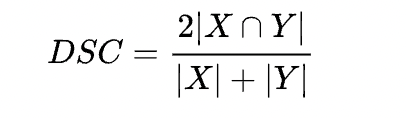

In [19]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten, BatchNormalization, ReLU, Reshape
import random as rn
import cv2
%load_ext tensorboard
import tensorflow as tf

In [20]:
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import datetime

In [21]:
# we are importing the pretrained unet from the segmentation models
# https://github.com/qubvel/segmentation_models
import segmentation_models as sm
from segmentation_models import Unet
sm.set_framework('tf.keras')
tf.keras.backend.set_image_data_format('channels_last')

Segmentation Models: using `keras` framework.


Using TensorFlow backend.


In [22]:
data_df1=data_df.drop('json',axis=1)
X_train, X_test = train_test_split(data_df1, test_size=0.2)

In [23]:
# loading the unet model and using the resnet 34 and initilized weights with imagenet weights
# "classes" :different types of classes in the dataset
model = Unet('resnet34', encoder_weights='imagenet', classes=21, activation='softmax',encoder_freeze=True,input_shape=(512,512,3))

85524480/85521592 [==============================] - 3s 0us/step


In [24]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 512, 512, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 518, 518, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 256, 256, 64) 9408        zero_padding2d[0][0]             
____________________________________________________________________________________________

In [25]:
aug2 = iaa.Fliplr(1)
aug4 = iaa.Emboss(alpha=(1), strength=1)
aug5 = iaa.DirectedEdgeDetect(alpha=(0.8), direction=(1.0))
aug6 = iaa.Sharpen(alpha=(1.0), lightness=(1.5))


In [26]:
def visualize(**images):
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        if i==1:
            plt.imshow(image, cmap='gray', vmax=1, vmin=0)
        else:
            plt.imshow(image)
    plt.show()
    
def normalize_image(mask):
    mask = mask//10
    return mask


In [27]:
class Dataset:
  CLASSES = [i for i in range(21)]
  def __init__(self, data_df1):

        self.data = data_df1
        # the paths of images
        self.images_fps   = list(self.data['image'].values)
        # the paths of segmentation images
        self.masks_fps    = list(self.data['mask'].values)
        # giving labels for each class
        self.class_values = self.CLASSES
  def __getitem__(self, i):
        
        # read data
        image = cv2.imread(self.images_fps[i], cv2.IMREAD_UNCHANGED)
        mask  = cv2.imread(self.masks_fps[i], cv2.IMREAD_UNCHANGED)
        image_mask = normalize_image(mask)
        # image=normalize_image(image)
        
        image_masks = [(image_mask == v) for v in self.class_values]
        image_mask = np.stack(image_masks, axis=-1).astype('float')

        #calculate the 50 percent of original dimensions
        width = 512
        height =512

        # dsize
        dsize = (width, height)

        # resize image
        image = cv2.resize(image, dsize,interpolation=cv2.INTER_NEAREST)
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_mask = cv2.resize(image_mask,dsize,interpolation=cv2.INTER_NEAREST)

        a = np.random.uniform()
        if len(self.data)>1000:
          if a<0.25:
              image = aug2.augment_image(image)
              image_mask = aug2.augment_image(image_mask)
          elif a<0.5:
              image = aug4.augment_image(image)
              image_mask = aug4.augment_image(image_mask)
          elif a<0.75:
              image = aug5.augment_image(image)
              image_mask = image_mask
          else:
              image = aug6.augment_image(image)
              image_mask = aug6.augment_image(image_mask)
            
        return image, image_mask
        
  def __len__(self):
        return len(self.data)
    
class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size=1, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(dataset))
    def __getitem__(self, i):
        
        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])
        
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]
        return tuple(batch)
    
    def __len__(self):
        return len(self.indexes) // self.batch_size
    
    def on_epoch_end(self):
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)

In [28]:
# Dataset for train images
train_dataset = Dataset(X_train)
test_dataset  = Dataset(X_test)

BATCH_SIZE=1
train_dataloader = Dataloder(train_dataset, batch_size=1, shuffle=True)
test_dataloader = Dataloder(test_dataset, batch_size=1, shuffle=True)

print(train_dataloader[0][0].shape)
assert train_dataloader[0][0].shape == (BATCH_SIZE, 512, 512, 3)
assert train_dataloader[0][1].shape == (BATCH_SIZE, 512, 512, 21)

(1, 512, 512, 3)


In [29]:
# define callbacks for learning rate scheduling and best checkpoints saving
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('./best_model.h5', save_weights_only=True, save_best_only=True, \
                                       mode='max', monitor='val_iou_score'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_iou_score', min_lr=0.000001,patience=2),
    #tensorboard callback
    tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True,write_grads=True)
]

In [30]:
# Clear any logs from previous runs
! rm -rf ./logs/

In [31]:
# https://github.com/qubvel/segmentation_models
import segmentation_models as sm
from segmentation_models.metrics import iou_score
from segmentation_models import Unet

optim = tf.keras.optimizers.Adam(0.0001)

focal_loss = sm.losses.cce_dice_loss

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss 
# total_loss = sm.losses.categorical_focal_dice_loss 

model.compile(optim, focal_loss, metrics=[sm.metrics.IOUScore(threshold=0.5,smooth=0.01)])

In [32]:
history = model.fit(train_dataloader, steps_per_epoch=len(train_dataloader), epochs=10,\
                              validation_data=test_dataloader,callbacks=callbacks, )

Epoch 1/10
3206/3206 [==============================] - 1158s 361ms/step - loss: 0.8363 - iou_score: 0.5243 - val_loss: 0.7836 - val_iou_score: 0.5162 - lr: 1.0000e-04
Epoch 2/10
3206/3206 [==============================] - 1163s 363ms/step - loss: 0.7335 - iou_score: 0.5545 - val_loss: 0.7649 - val_iou_score: 0.5344 - lr: 1.0000e-04
Epoch 3/10
3206/3206 [==============================] - 1154s 360ms/step - loss: 0.7079 - iou_score: 0.5753 - val_loss: 0.7458 - val_iou_score: 0.5421 - lr: 1.0000e-04
Epoch 4/10
3206/3206 [==============================] - 1133s 353ms/step - loss: 0.6834 - iou_score: 0.5973 - val_loss: 0.7409 - val_iou_score: 0.5510 - lr: 1.0000e-05
Epoch 5/10
3206/3206 [==============================] - 1132s 353ms/step - loss: 0.6761 - iou_score: 0.7044 - val_loss: 0.7438 - val_iou_score: 0.5486 - lr: 1.0000e-05
Epoch 6/10
3206/3206 [==============================] - 1126s 351ms/step - loss: 0.6734 - iou_score: 0.7619 - val_loss: 0.7376 - val_iou_score: 0.5508 - lr: 1.0

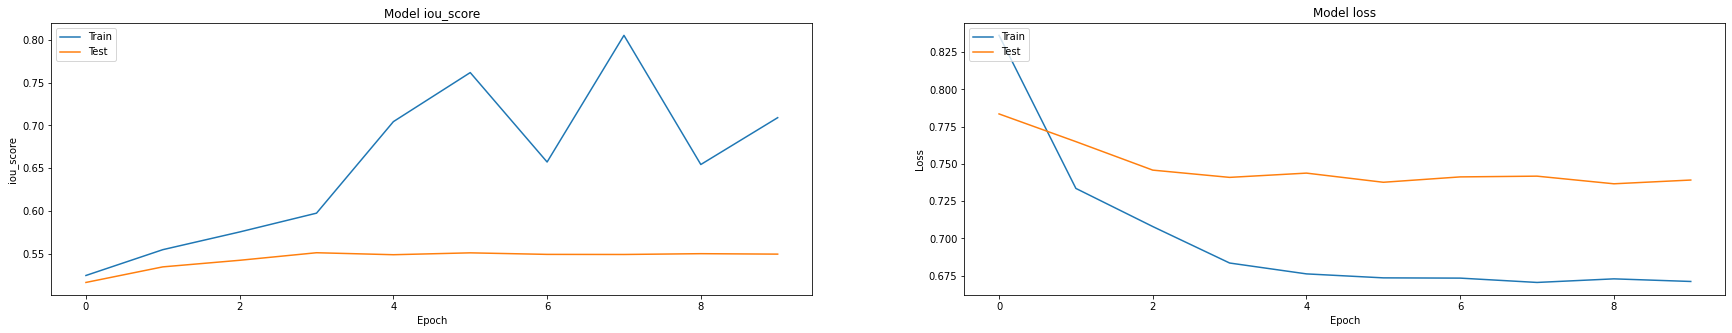

In [33]:
# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

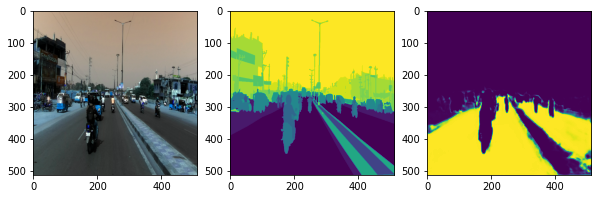

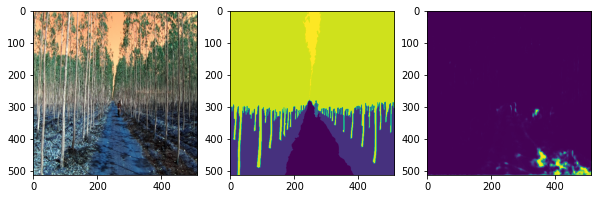

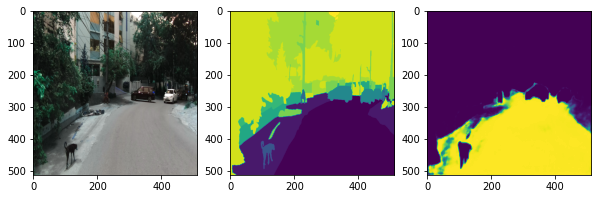

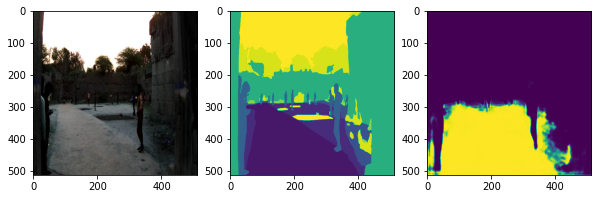

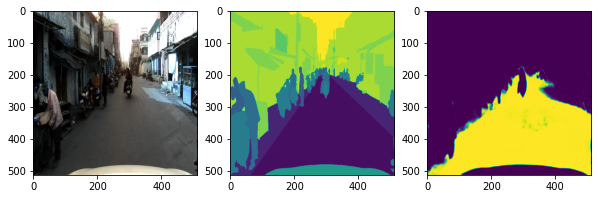

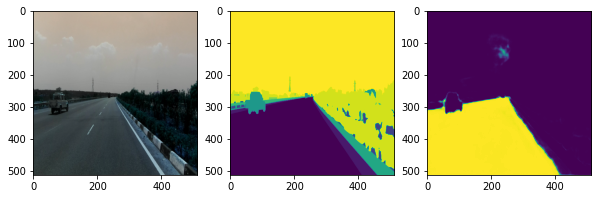

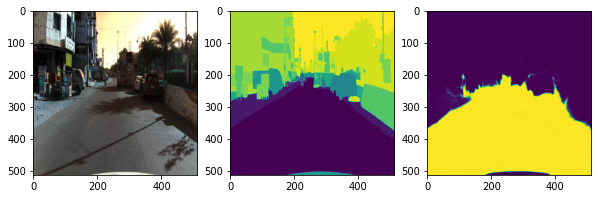

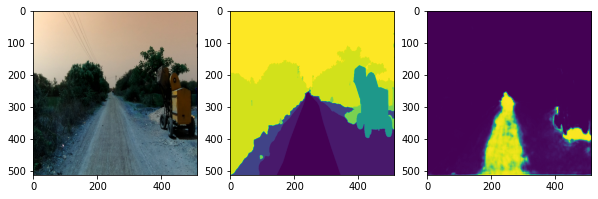

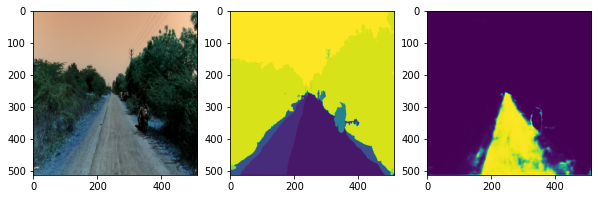

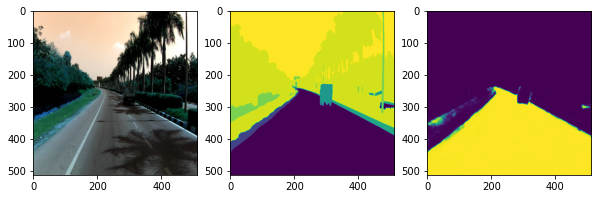

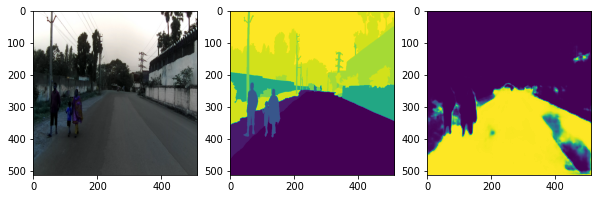

In [51]:
count=0
for path in X_test.values:
    #original image
    count+=1
    image = cv2.imread(path[0], cv2.IMREAD_UNCHANGED)
    image = cv2.resize(image, (512,512)) 
    
    #predicted segmentation map
    predicted  = model.predict(image[np.newaxis,:,:,:])
    #original segmentation map
    image_mask = cv2.imread(path[1], cv2.IMREAD_UNCHANGED)
    image_mask = cv2.resize(image_mask, (512,512))

    plt.figure(figsize=(10,6))
    plt.subplot(131)
    plt.imshow(image)
    plt.subplot(132)
    plt.imshow(image_mask)
    plt.subplot(133)
    plt.imshow(predicted[0,:,:,1])
    plt.show()
    if count==20:
      break

TASK 3

In [52]:
import tensorflow as tf
# tf.compat.v1.enable_eager_execution()
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Multiply
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [53]:
import segmentation_models as sm
from segmentation_models.metrics import iou_score

optim = tf.keras.optimizers.Adam(0.0001)

focal_loss = sm.losses.cce_dice_loss
# total_loss = sm.losses.categorical_focal_dice_loss 

In [54]:
class convolutional_block(tf.keras.layers.Layer):
    def __init__(self,  filters=[4,4,8], stride=1):
        super().__init__()
        self.F1, self.F2, self.F3 = filters
        # self.kernel = kernel
        self.stride = stride
        self.conv1 = tf.keras.layers.Conv2D(self.F1, (1, 1),kernel_initializer=glorot_uniform(seed=0))
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.conv2 = tf.keras.layers.Conv2D(self.F2, (3,3), padding='same',strides=self.stride,kernel_initializer=glorot_uniform(seed=0))
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.conv3 = tf.keras.layers.Conv2D(self.F3, (1,1), padding='same')
        self.bn3 = tf.keras.layers.BatchNormalization()
        self.conv_parallel = tf.keras.layers.Conv2D(self.F3, (3,3), padding='same',strides=self.stride,kernel_initializer=glorot_uniform(seed=0))
        self.bn_p = tf.keras.layers.BatchNormalization()
    def get_config(self):
        cfg = super().get_config()
        return cfg 
    def call(self, input_tensor):
        # write the architecutre that was mentioned above
        x = self.conv1(input_tensor)
        x = self.bn1(x)
        x = tf.nn.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = tf.nn.relu(x)
        x = self.conv3(x)
        x = self.bn3(x)
        #identity mapping
        z=self.conv_parallel(input_tensor)
        z = self.bn_p(z)
        z = tf.nn.relu(z)
        x = tf.nn.relu(x+z)
        return x

In [55]:
class identity_block(tf.keras.layers.Layer):
    def __init__(self, kernel=3,  filters=[4,4,8]):
        super().__init__()
        self.F1, self.F2, self.F3 = filters
        self.kernel = kernel
        self.conv1a = tf.keras.layers.Conv2D(self.F1, (1, 1),kernel_initializer=glorot_uniform(seed=0))
        self.bn1a = tf.keras.layers.BatchNormalization()
        self.conv2a = tf.keras.layers.Conv2D(self.F2, (3,3), padding='same',kernel_initializer=glorot_uniform(seed=0))
        self.bn2a= tf.keras.layers.BatchNormalization()
        self.conv3a = tf.keras.layers.Conv2D(self.F3, (1,1), padding='same',kernel_initializer=glorot_uniform(seed=0))
        self.bn3a = tf.keras.layers.BatchNormalization()
    def get_config(self):
        cfg = super().get_config()
        return cfg 
    def call(self, input):
        # write the architecutre that was mentioned above
        x = self.conv1a(input)
        x = self.bn1a(x)
        x = tf.nn.relu(x)
        x = self.conv2a(x)
        x = self.bn2a(x)
        x = tf.nn.relu(x)
        x = self.conv3a(x)
        x = self.bn3a(x)
        #identity mapping
        x=x+input
        x = tf.nn.relu(x)
        return x

In [56]:
class global_flow(tf.keras.layers.Layer):
    def __init__(self,filters=[8], name="global_flow"):
        super().__init__(name=name)
        self.fi=filters[0]
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.gap=tf.keras.layers.GlobalAveragePooling2D()
        self.conv1 = tf.keras.layers.Conv2D(filters=self.fi,kernel_size=(1, 1),padding='same',kernel_initializer=glorot_uniform(seed=0))
        self.up=tf.keras.layers.UpSampling2D(size=(64, 64),interpolation="bilinear")
    def get_config(self):
        cfg = super().get_config()
        return cfg 
    def call(self, X):
        # implement the global flow operation
        X=self.gap(X)
        X = tf.keras.layers.Reshape((1, 1, X.shape[1]))(X)
        X=self.bn1(X)
        X = tf.nn.relu(X)
        X=self.conv1(X)
        X=self.up(X)
        return X

In [57]:
class context_flow(tf.keras.layers.Layer):    
    def __init__(self,filters=[8]):
        super().__init__()
        self.fi=filters[0]
        self.concate=tf.keras.layers.Concatenate(axis=-1,)
        self.avg_pool=tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=(2, 2))
        self.conv2 = tf.keras.layers.Conv2D(filters=self.fi, kernel_size=(3,3), padding='same',kernel_initializer=glorot_uniform(seed=0))
        self.conv3 = tf.keras.layers.Conv2D(filters=self.fi, kernel_size=(3,3), padding='same',kernel_initializer=glorot_uniform(seed=0))
        self.conv4 = tf.keras.layers.Conv2D(filters=self.fi, kernel_size=(1,1), padding='same',kernel_initializer=glorot_uniform(seed=0))
        self.conv5 = tf.keras.layers.Conv2D(filters=self.fi, kernel_size=(1,1), padding='same',kernel_initializer=glorot_uniform(seed=0))
        self.up=tf.keras.layers.UpSampling2D(size=(2, 2),interpolation="bilinear")
    def get_config(self):
        cfg = super().get_config()
        return cfg 
    def call(self, X):
        # here X will a list of two elements 
        INP, FLOW = X[0], X[1]
        X=self.concate([INP,FLOW])
        X=self.avg_pool(X)
        X=self.conv2(X)
        X1=self.conv3(X)
        X=self.conv4(X1)
        X=tf.nn.relu(X)
        X=self.conv5(X)
        X=tf.keras.activations.sigmoid(X)
        X=tf.math.multiply(X, X1)
        X=tf.add(X, X1)
        X=self.up(X)
        # implement the context flow as mentioned in the above cell
        return X

In [58]:
class fsm(tf.keras.layers.Layer):    
    def __init__(self,filters=[8], name="feature_selection"):
        super().__init__(name=name)
        self.fi=filters[0]
        self.conv2 = tf.keras.layers.Conv2D(filters=self.fi, kernel_size=(3,3), padding='same',kernel_initializer=glorot_uniform(seed=0))
        self.global_max_p= tf.keras.layers.GlobalMaxPool2D()
        self.conv3 = tf.keras.layers.Conv2D(filters=self.fi, kernel_size=(1,1), padding='same',kernel_initializer=glorot_uniform(seed=0))
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.up=tf.keras.layers.UpSampling2D(size=(2, 2),interpolation="bilinear")
    def get_config(self):
        cfg = super().get_config()
        return cfg 
    def call(self, X):
        # implement the FSM modules based on image in the above cells
        X1=self.conv2(X)
        X=self.global_max_p(X1)
        X = tf.keras.layers.Reshape((1, 1, X.shape[1]))(X)
        X=self.conv3(X)
        X=self.bn1(X)
        X=tf.keras.activations.sigmoid(X)
        X=tf.math.multiply(X, X1)
        FSM_Conv_T=self.up(X)
        return FSM_Conv_T

In [59]:
class agcn(tf.keras.layers.Layer):    
    def __init__(self, filters=[8],name="global_conv_net"):
        super().__init__(name=name)
        self.fi=filters[0]
        self.conv1 = tf.keras.layers.Conv2D(filters=self.fi, kernel_size=(1,7), padding='same',kernel_initializer=glorot_uniform(seed=0))
        self.conv2 = tf.keras.layers.Conv2D(filters=self.fi, kernel_size=(7,1), padding='same',kernel_initializer=glorot_uniform(seed=0))
        self.conv3 = tf.keras.layers.Conv2D(filters=self.fi, kernel_size=(1,7), padding='same',kernel_initializer=glorot_uniform(seed=0))
        self.conv4 = tf.keras.layers.Conv2D(filters=self.fi, kernel_size=(7,1), padding='same',kernel_initializer=glorot_uniform(seed=0))
        self.conv5 = tf.keras.layers.Conv2D(filters=self.fi, kernel_size=(3,3), padding='same',kernel_initializer=glorot_uniform(seed=0))
    def get_config(self):
        cfg = super().get_config()
        return cfg 
    def call(self, X):
        # please implement the above mentioned architecture
        C1=X
        X=self.conv2(C1)
        X1=self.conv1(X)
        X=self.conv3(C1)
        X2=self.conv4(X)
        sum=tf.add(X1, X2)
        X=self.conv5(sum)
        sum=tf.add(X, sum)
        return X

In [60]:
channel1=[convolutional_block([4,4,8],2),identity_block([4,4,8])]
channel2=[convolutional_block([8,8,16],2),identity_block(filters=[8,8,16]),identity_block(filters=[8,8,16])]
channel3=[convolutional_block([16,16,32]),identity_block(filters=[16,16,32]),identity_block(filters=[16,16,32]),identity_block(filters=[16,16,32])]
channel4=[convolutional_block([32,32,64]),identity_block(filters=[32,32,64]),identity_block(filters=[32,32,64]),identity_block(filters=[32,32,64]),identity_block(filters=[32,32,64])]

In [61]:
X_input = Input(shape=(512,512,3))

# Stage 1
X = Conv2D(64, (3, 3), name='conv1', padding="same", kernel_initializer=glorot_uniform(seed=0))(X_input)
X = BatchNormalization(axis=3, name='bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)
X=channel1[0](X)
C1_out=channel1[1](X)
X=channel2[0](C1_out)
X=channel2[1](X)
X=channel2[2](X)
X=channel3[0](X)
X=channel3[1](X)
X=channel3[2](X)
X=channel3[3](X)
X=channel4[0](X)
X=channel4[1](X)
X=channel4[2](X)
X=channel4[3](X)
C_4=channel4[4](X)
GF=global_flow(filters=[32])(C_4)
CF1=context_flow(filters=[32])([C_4,GF])
CF2=context_flow(filters=[32])([C_4,CF1])
CF3=context_flow(filters=[32])([C_4,CF2])
sum=tf.keras.layers.Add()([GF, CF1,CF2,CF3])
weigted_matrix=fsm(filters=[32])(sum)
A=agcn(filters=[32])(C1_out)
concat=tf.keras.layers.Concatenate(axis=-1,)([weigted_matrix,A])
out=tf.keras.layers.Conv2D(filters=21, kernel_size=(3,3), padding='same')(concat)
out=tf.nn.relu(out)
upsamp=tf.keras.layers.UpSampling2D(size=(4, 4),interpolation="bilinear")(out)
drop=Dropout(0.5)(upsamp)
output=tf.keras.activations.softmax(upsamp)

In [62]:
model = Model(inputs = X_input, outputs = output)
model.compile(optim, focal_loss, metrics=[sm.metrics.IOUScore(threshold=0.5,smooth=0.01)])

In [63]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 512, 512, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 512, 512, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, 512, 512, 64) 0           bn_conv1[0][0]                   
____________________________________________________________________________________________

In [64]:
tf.keras.utils.plot_model(model, to_file='model4.png', show_shapes=True, show_layer_names=True,rankdir='TB')

In [65]:
# define callbacks for learning rate scheduling and best checkpoints saving
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('./best_model.h5', save_weights_only=True, save_best_only=True, \
                                       mode='max', monitor='val_iou_score'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_iou_score', min_lr=0.000001,patience=2),
    #tensorboard callback
    tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0, write_graph=True,write_grads=True)
]

In [66]:
# Clear any logs from previous runs
! rm -rf ./logs/

In [67]:
history = model.fit(train_dataloader, steps_per_epoch=len(train_dataloader), epochs=10,\
                              validation_data=test_dataloader,callbacks=callbacks, )

Epoch 1/10
   2/3206 [..............................] - ETA: 20:09 - loss: 1.2459 - iou_score: 0.2021WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.350767). Check your callbacks.


3206/3206 [==============================] - 1153s 360ms/step - loss: 0.9109 - iou_score: 0.4238 - val_loss: 1.1231 - val_iou_score: 0.3888 - lr: 1.0000e-04
Epoch 2/10
3206/3206 [==============================] - 1149s 358ms/step - loss: 0.8608 - iou_score: 0.4283 - val_loss: 1.1231 - val_iou_score: 0.3888 - lr: 1.0000e-04
Epoch 3/10
3206/3206 [==============================] - 1138s 355ms/step - loss: 0.8364 - iou_score: 0.4276 - val_loss: 1.1231 - val_iou_score: 0.3888 - lr: 1.0000e-04
Epoch 4/10
3206/3206 [==============================] - 1141s 356ms/step - loss: 0.8163 - iou_score: 0.4388 - val_loss: 1.1231 - val_iou_score: 0.3888 - lr: 1.0000e-05
Epoch 5/10
3206/3206 [==============================] - 1131s 353ms/step - loss: 0.8137 - iou_score: 0.4327 - val_loss: 1.1231 - val_iou_score: 0.3888 - lr: 1.0000e-05
Epoch 6/10
3206/3206 [==============================] - 1117s 348ms/step - loss: 0.8115 - iou_score: 0.4391 - val_loss: 1.1231 - val_iou_score: 0.3888 - lr: 1.0000e-06
Epo

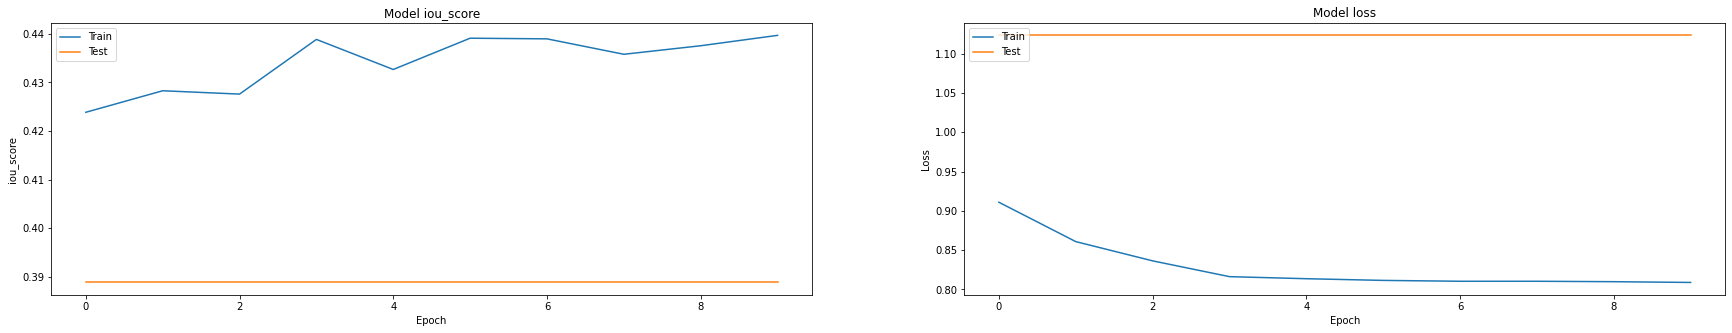

In [68]:
# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

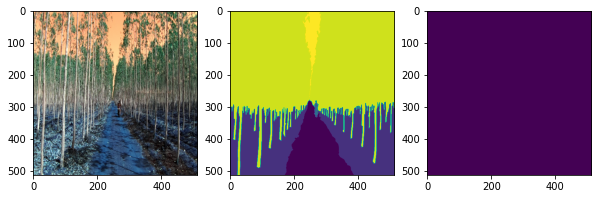

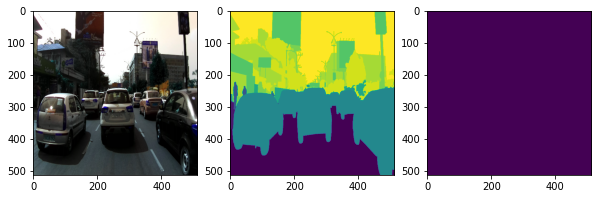

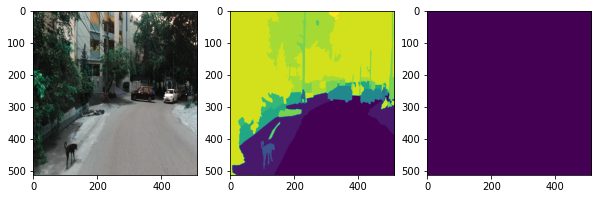

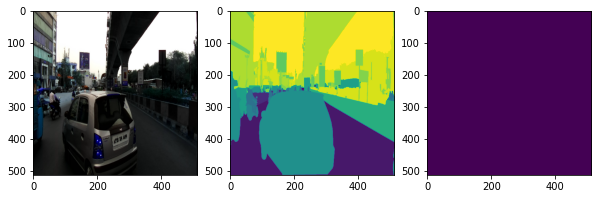

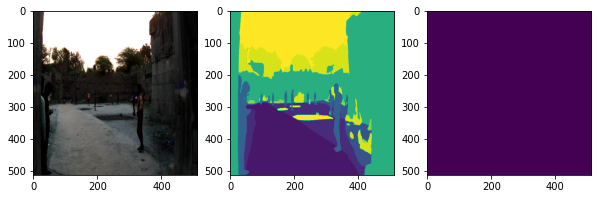

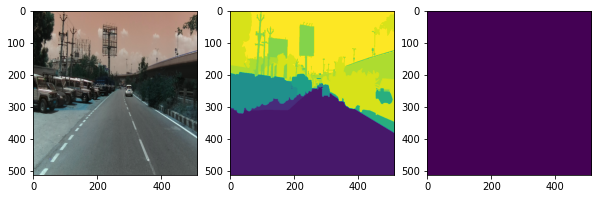

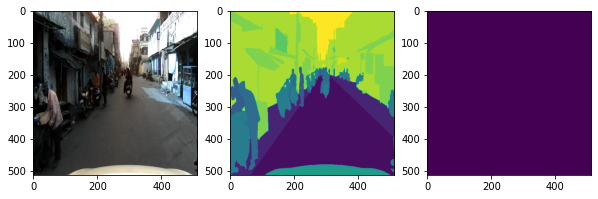

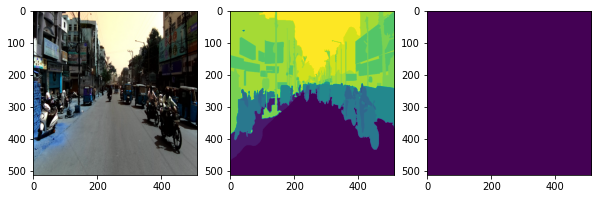

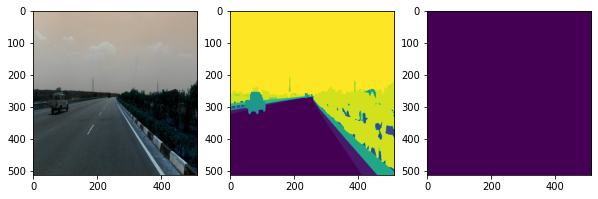

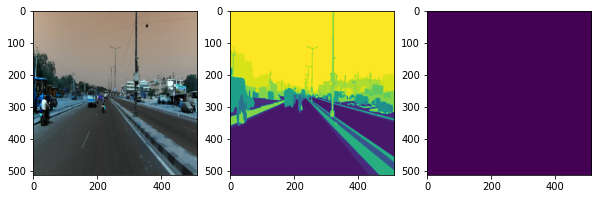

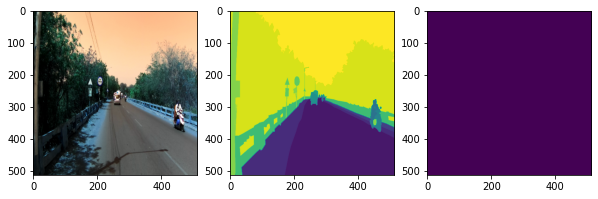

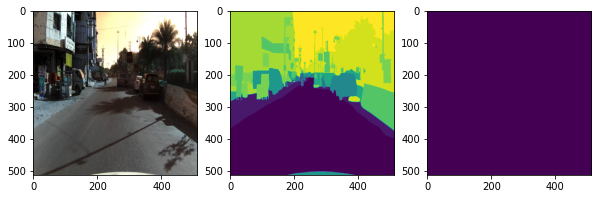

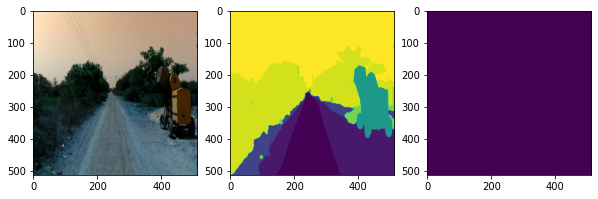

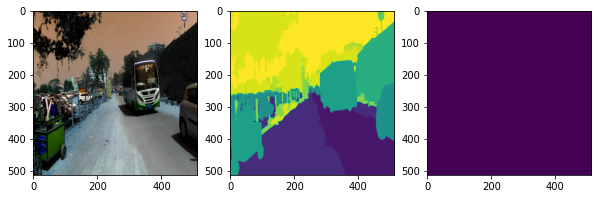

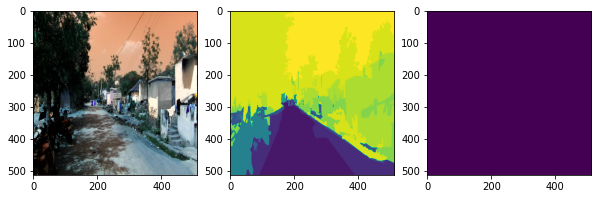

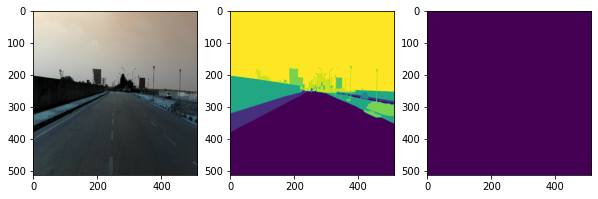

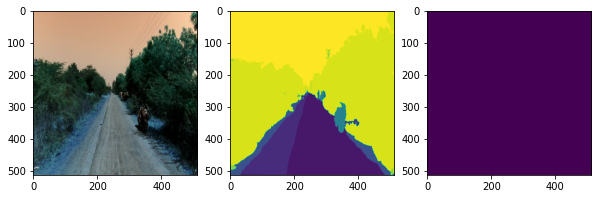

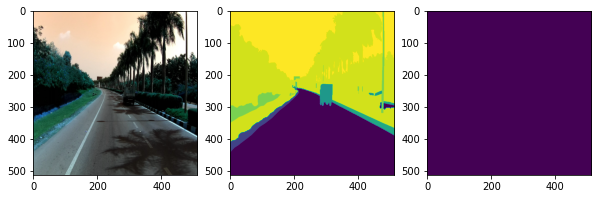

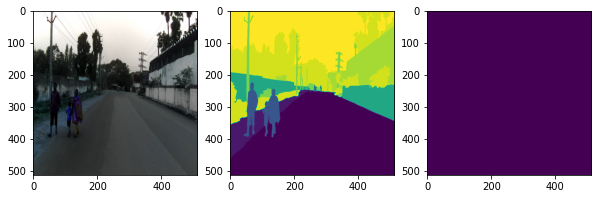

In [69]:
count=0
for path in X_test.values:
    #original image
    count+=1
    image = cv2.imread(path[0], cv2.IMREAD_UNCHANGED)
    image = cv2.resize(image, (512,512)) 
    
    #predicted segmentation map
    predicted  = model.predict(image[np.newaxis,:,:,:])
    #original segmentation map
    image_mask = cv2.imread(path[1], cv2.IMREAD_UNCHANGED)
    image_mask = cv2.resize(image_mask, (512,512))

    plt.figure(figsize=(10,6))
    plt.subplot(131)
    plt.imshow(image)
    plt.subplot(132)
    plt.imshow(image_mask)
    plt.subplot(133)
    plt.imshow(predicted[0,:,:,0])
    plt.show()
    if count==20:
      break